#Install perintah

In [3]:
!pip install opencv-python

In [4]:
!pip install matplotlib

In [5]:
!pip install numpy

In [6]:
!pip install pillow

#load the LIB

In [7]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import cv2
from scipy import signal
from scipy.ndimage import gaussian_filter
from skimage import io
import numpy as np

#load the IMG

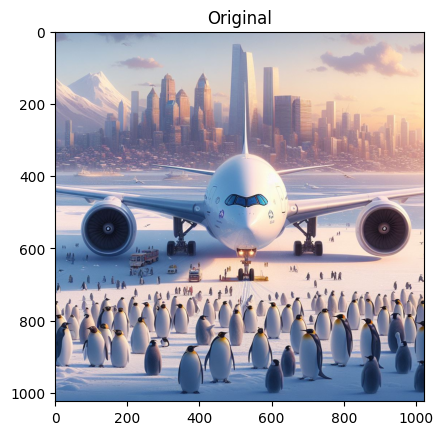

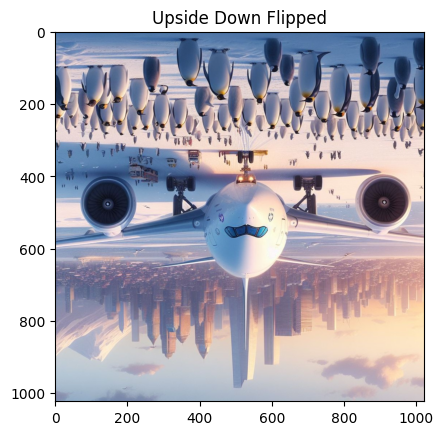

In [8]:
imgUpsidedown = cv2.imread('/content/drive/MyDrive/Semester 5/PENGOLAHAN CITRA/notebook/upside-down-flipped.jpg')
imageOriginal = cv2.imread('/content/drive/MyDrive/Semester 5/PENGOLAHAN CITRA/notebook/gambar_ori.jpg')

# Convert the BGR image to RGB format
imgUpsidedown = cv2.cvtColor(imgUpsidedown, cv2.COLOR_BGR2RGB)
imageOriginal = cv2.cvtColor(imageOriginal, cv2.COLOR_BGR2RGB)

plt.imshow(imageOriginal)
plt.title("Original")
plt.show()

plt.imshow(imgUpsidedown)
plt.title("Upside Down Flipped")
plt.show()

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Image rotate

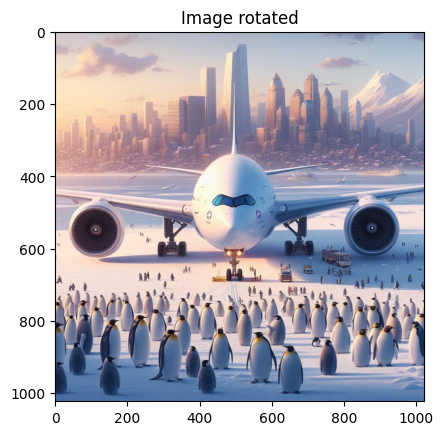

In [11]:
# Open the image
img = Image.open('/content/drive/MyDrive/Semester 5/PENGOLAHAN CITRA/notebook/upside-down-flipped.jpg')

# Rotate the image back to normal
img = img.rotate(180)

# Save the rotated image
img.save('rotated_image.jpg')

imgrotated = cv2.imread('/content/rotated_image.jpg')

# Convert the BGR image to RGB format
imgrotated = cv2.cvtColor(imgrotated, cv2.COLOR_BGR2RGB)

plt.imshow(imgrotated)
plt.title("Image rotated")
plt.show()

#image flip

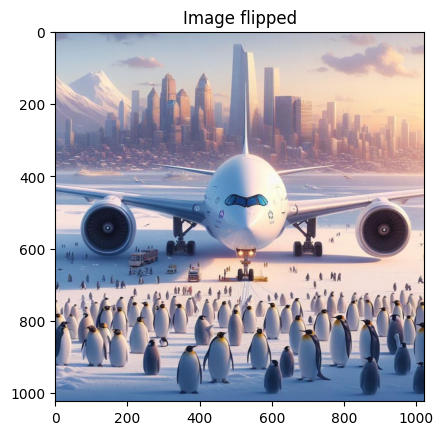

In [12]:
# Open the image
img = Image.open('/content/rotated_image.jpg')

# Flip the image horizontally
img = img.transpose(Image.FLIP_LEFT_RIGHT)

# Save the flipped image
img.save('flipped_image.jpg')

#show the img
imgflipped = cv2.imread('/content/flipped_image.jpg')

# Convert the BGR image to RGB format
imgflipped = cv2.cvtColor(imgflipped, cv2.COLOR_BGR2RGB)

plt.imshow(imgflipped)
plt.title("Image flipped")
plt.show()

#Superrrrrrrrrrrrrrrr Resolution

Original size: 1023 x 1023
New size: 4000 x 4000


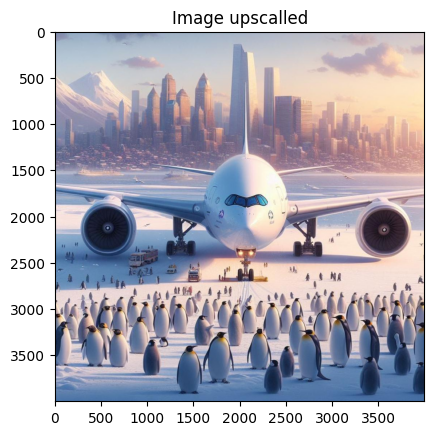

In [13]:
# Load the image from a file
infile = "/content/flipped_image.jpg"
im = Image.open(infile)

# Get the original size of the image
width, height = im.size
print(f"Original size: {width} x {height}")

# Calculate the scaling factor to get the desired size

scale = 4000 / width
new_width = int(width * scale)
new_height = int(height * scale)

# Resize the image using the nearest neighbor filter
im = im.resize((new_width, new_height), Image.NEAREST)

# Save the resized image to a new file
outfile = "image_resized.jpg"
im.save(outfile, "PNG")

# Print the new size of the image
print(f"New size: {new_width} x {new_height}")

#show the img
imgultra = cv2.imread('/content/image_resized.jpg')

# Convert the BGR image to RGB format
imgultra = cv2.cvtColor(imgultra, cv2.COLOR_BGR2RGB)

plt.imshow(imgultra)
plt.title("Image upscalled")
plt.show()

#Superrrr Smooooooooth

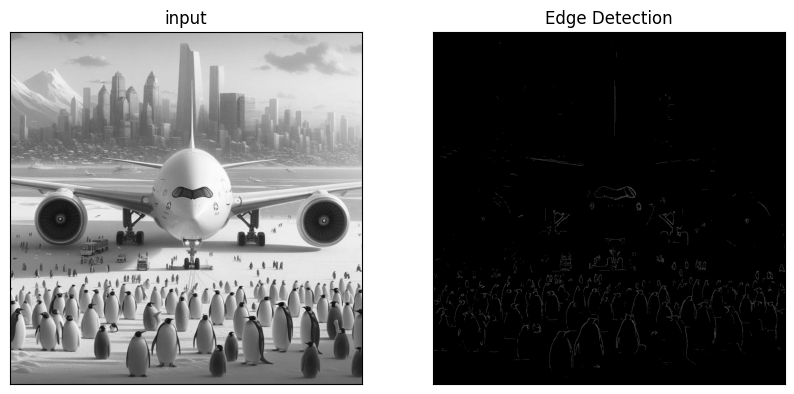

In [14]:
# Load img
img = cv2.imread('/content/image_resized.jpg', cv2.IMREAD_GRAYSCALE)

# edge detection using Canny
edges = cv2.Canny(img, 200, 300)

# show the  original image & edge detection ones
plt.figure(figsize=(10, 10))

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('input'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Detection'), plt.xticks([]), plt.yticks([])

plt.show()

#Img LPF

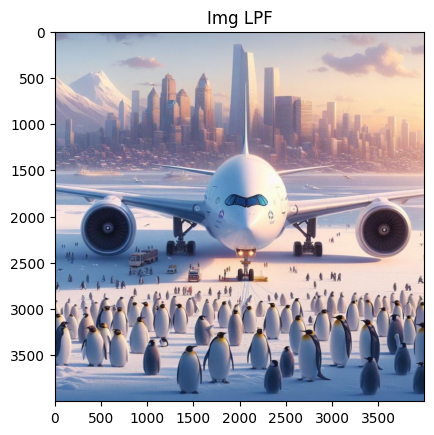

In [15]:
# Load the image
image = cv2.imread('/content/image_resized.jpg')
#image = edges

# Define the kernel size for LPF
ksize = (2, 2)

# Define the LPF function
def lpf(image, ksize):
    # Create a kernel
    kernel = np.ones(ksize, dtype=int) / (ksize[0] * ksize[1])

    # Apply the LPF to the image
    image_lpf = cv2.filter2D(image, -1, kernel)

    return image_lpf

# Apply LPF to the image
image_lpf = lpf(image, ksize)

# Save the result
cv2.imwrite('image_lpf.jpg', image_lpf)

#show the img
imglpf = cv2.imread('/content/image_lpf.jpg')

# Convert the BGR image to RGB format
imglpf = cv2.cvtColor(imglpf, cv2.COLOR_BGR2RGB)

plt.imshow(imglpf)
plt.title("Img LPF")
plt.show()

#Hasil

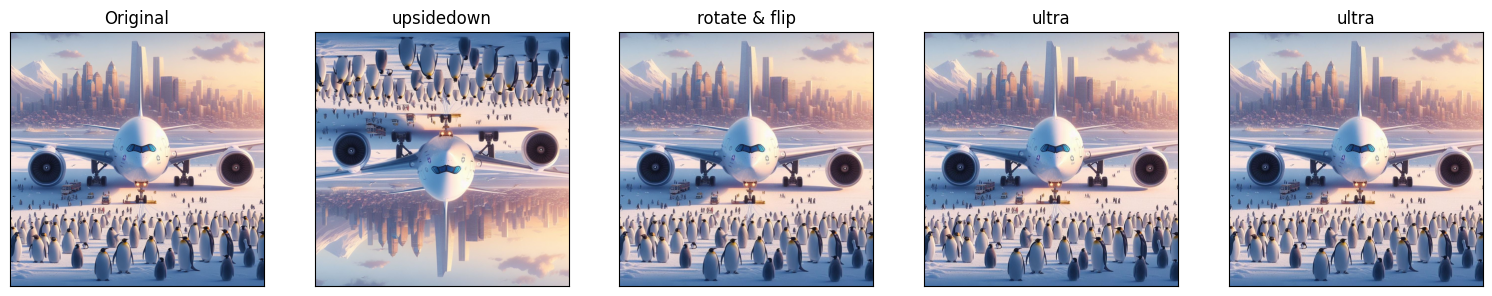

In [16]:
plt.figure(figsize=(19, 17))
plt.subplot(151), plt.imshow(imageOriginal),plt.title('Original')
plt.xticks([]),plt.yticks([])
plt.subplot(152), plt.imshow(imgUpsidedown),plt.title('upsidedown')
plt.xticks([]),plt.yticks([])
plt.subplot(153), plt.imshow(imgflipped),plt.title('rotate & flip')
plt.xticks([]),plt.yticks([])
plt.subplot(154), plt.imshow(imgultra),plt.title('ultra')
plt.xticks([]),plt.yticks([])
plt.subplot(155), plt.imshow(imgultra),plt.title('ultra')
plt.xticks([]),plt.yticks([])
plt.show()